In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Loading the Dataset and checking it's contents and checking the data quality

In [200]:
df = pd.read_csv('C:\\Users\\Sejal Chopra\\Documents\\PG Resources\\Bike_Sharing\\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [201]:
# To find out the shape of the dataset
df.shape

(730, 16)

Since the Model is to be built for 'cnt' as target variable. We can drop the 'casual' and 'registered' columns since 'cnt' is a summation of those columns

In [202]:
# Checking Columns Data Types and Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no Null values!

In [203]:
# Since 'cnt' is a sum of 'casual' and 'registered', we can drop these two columns
df.drop(['casual', 'registered'], inplace=True, axis = 1)


#Dropping instant column as it is just an index
df.drop(['instant'], inplace=True, axis = 1)
df.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [204]:
# Changing the month number to month abbr for better view
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [205]:
# Changing the datatype of  season, weekday and weathesit to string
df[['season','weekday','weathersit']] = df[['season','weekday','weathersit']].astype(str)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 74.3+ KB


In [207]:
# Analyzing the numerical columns
df[['temp', 'atemp', 'hum', 'windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


In [208]:
# Converting the weather variable into more understanable text
df['weathersit'].replace(['1','2','3','4'],['Good', 'Average', 'Bad', 'Very Bad'], inplace=True)

In [209]:
# Converting the seasons into specific season names for better understanding
df['season'].replace(['1','2','3','4'],['spring', 'summer', 'fall', 'winter'], inplace=True)

### Visualizing the data

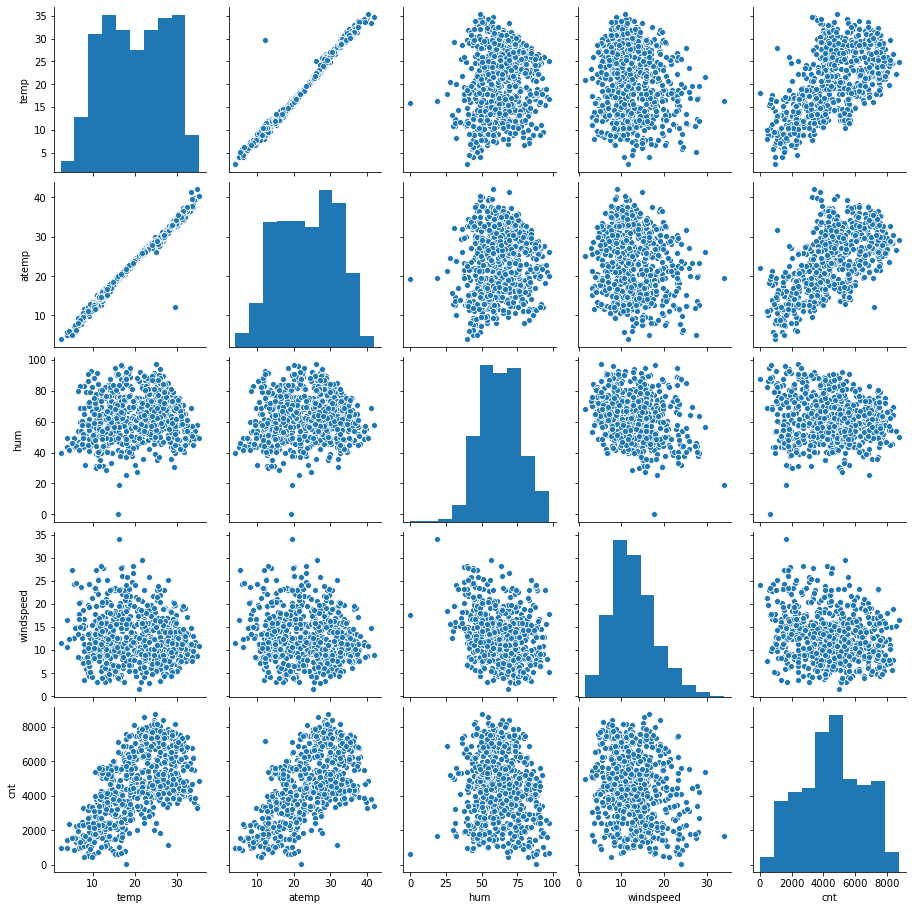

In [210]:
# Checking linear relationship between the cnt variable and other numeric variables
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

We can see that there is some corelation between Temperature and Sales and Feeling Temperature and Sales. 

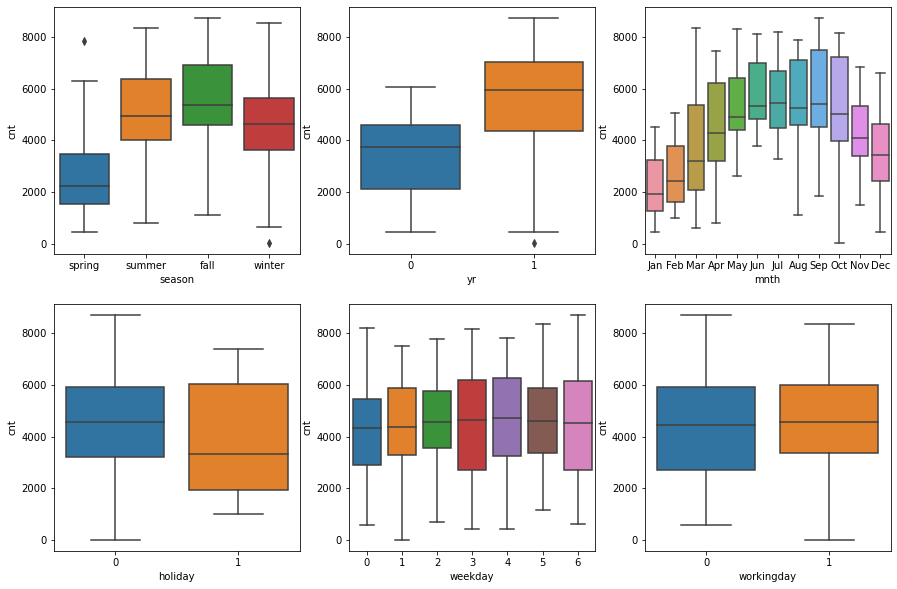

In [211]:
# Checking the distribution of rentals across different categorical variables
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.show()

Inferences: 
1. It seems that during the summer months, the registration count picks up.
2. Also the count in 2019 are much higher than the count in 2018.

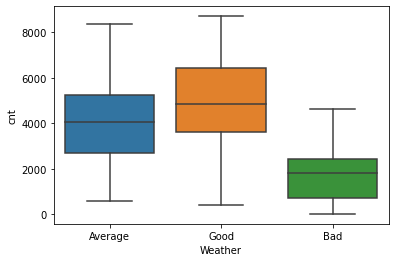

In [212]:
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.xlabel('Weather')
plt.show()

Count picks up in Good Weather days as is expected

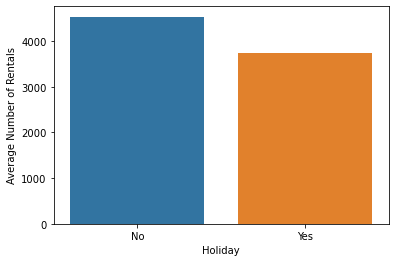

In [213]:
# Checking business on Holidays
holiday_df = df.groupby(['holiday'])['cnt'].mean().reset_index()
sns.barplot(x='holiday', y='cnt', data=holiday_df)
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Holiday')
plt.ylabel('Average Number of Rentals')
plt.show()

Working days(not holidays) have slight higher average rentals. This might be due to the fact that people are using bikes as a means of transportation to their work-place.

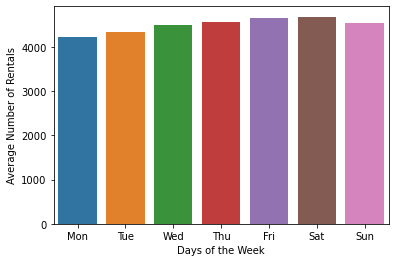

In [214]:
# Total rentals on different days of the week.
weekday_df = df.groupby(['weekday'])['cnt'].mean().reset_index()
sns.barplot(x='weekday', y='cnt', data=weekday_df)
plt.xticks(np.arange(7),('Mon','Tue','Wed','Thu', 'Fri', 'Sat', 'Sun'))
plt.xlabel('Days of the Week')
plt.ylabel('Average Number of Rentals')
plt.show()

Rentals are uniform throughout the week with Friday and Saturdays having highest average number of rentals.

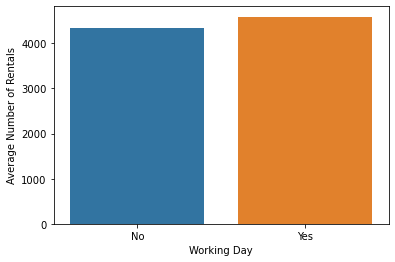

In [215]:
# Checking business on Workingdays
workingday_df = df.groupby(['workingday'])['cnt'].mean().reset_index()
sns.barplot(x='workingday', y='cnt', data=workingday_df)
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Working Day')
plt.ylabel('Average Number of Rentals')
plt.show()

### Creating Dummy Variables for Categorical Data
#### We need to create dummy variables for the following columns:
- season
- mnth
- weekday
- weathersit

In [216]:
dummy = pd.get_dummies(df[['season','mnth','weekday','weathersit']], drop_first=True)
dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [217]:
df = pd.concat([df,dummy], axis=1)   #Axis=1 is for horizontal stacking
df = df.drop(['season','mnth','weekday','weathersit'], axis=1)
df.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good
0,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [218]:
print('Shape of the new dataframe is:' , df.shape)

Shape of the new dataframe is: (730, 31)


In [219]:
# Since we have the month and the Year in two seperate columns, we do not need the date column anymore, thus dropping it
df.drop('dteday', inplace=True, axis = 1)

### Splitting the data into Train and Test Dataset

In [220]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [221]:
print('Shape of the Train data is:' , df_train.shape)
print('Shape of the Test data is:' , df_test.shape)

Shape of the Train data is: (510, 30)
Shape of the Test data is: (220, 30)


In [222]:
# Checking the Train Data
pd.set_option('display.max_columns', None)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Other than the numeric fields, all other categorical values have been encoded.

### Feature Scaling

In [223]:
# We will use MinMax scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

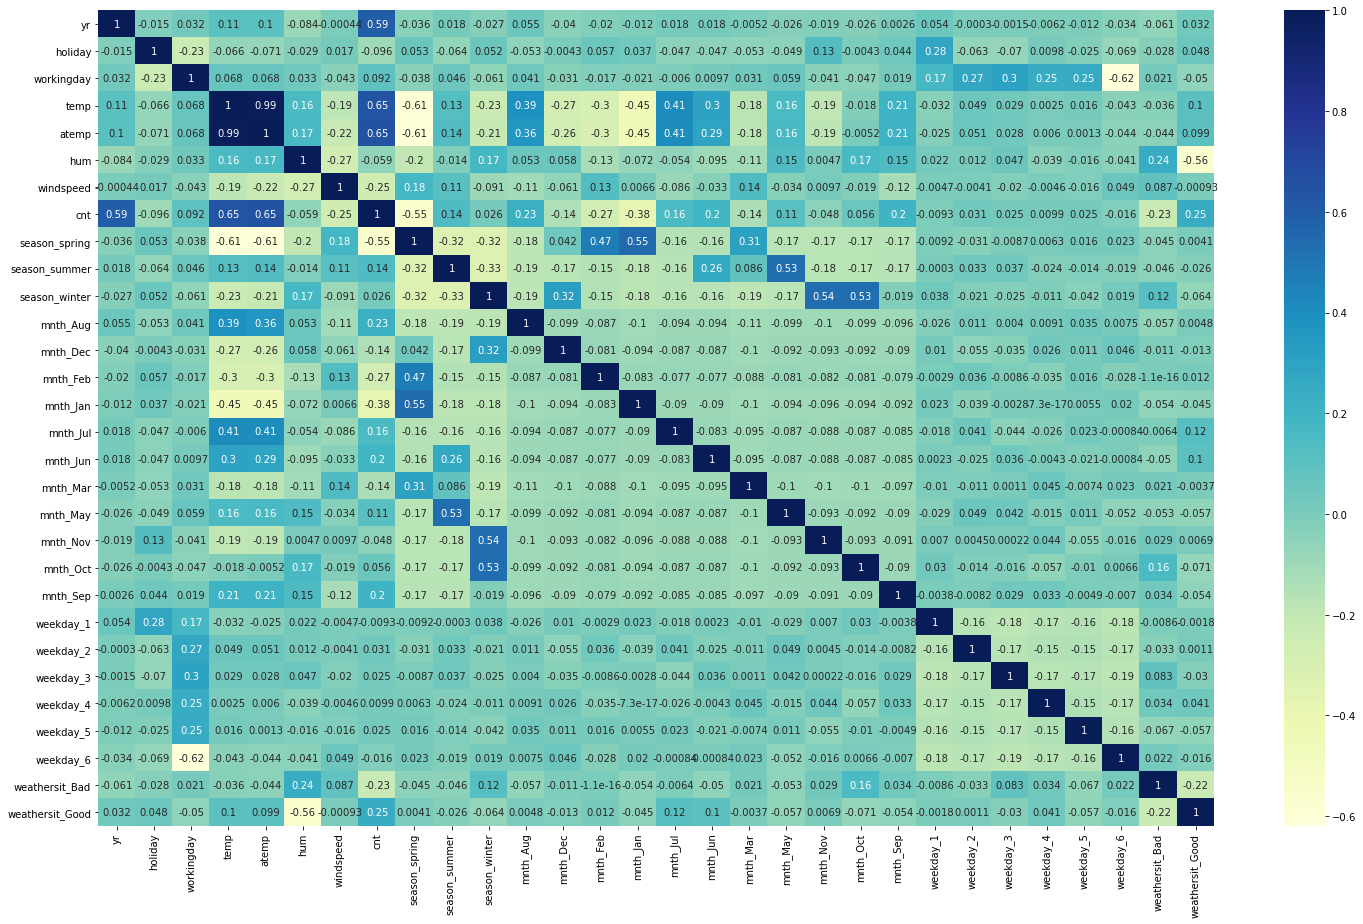

In [224]:
# Checking the Heatmap
plt.figure(figsize=(25,15))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

<b>cnt</b> has strong colinearity with <b>yr</b>, <b>temp</b>, <b>atemp</b>. <br> But, <b>temp</b> and <b>atemp</b> have almost a perfect colinearity, so we can remove one of these columns before building the model

In [225]:

df.drop(['temp'],axis=1,inplace=True)
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Building the Model


In [226]:
#CREATING X AND Y
y_train = df_train.pop('cnt')
X_train = df_train

In [229]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#USING RFE APPROACH FOR FEATURE SELECTION
# WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [230]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', False, 9),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_1', False, 7),
 ('weekday_2', False, 8),
 ('weekday_3', False, 13),
 ('weekday_4', False, 14),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_Bad', True, 1),
 ('weathersit_Good', True, 1)]

In [231]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weekday_6', 'weathersit_Bad', 'weathersit_Good'],
      dtype='object')

In [232]:
X_train.columns[~rfe.support_]

Index(['workingday', 'temp', 'season_summer', 'mnth_Aug', 'mnth_Feb',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

In [233]:
X_train_rfe = X_train[col]

In [234]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [235]:
lm = sm.OLS(y_train,X_train_rfe1).fit()


In [236]:
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.5
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          2.73e-186
Time:                        19:19:41   Log-Likelihood:                 508.15
No. Observations:                 510   AIC:                            -984.3
Df Residuals:                     494   BIC:                            -916.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3107      0.036     

In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,19.60
2,atemp,19.42
4,windspeed,4.15
14,weathersit_Good,3.27
5,season_spring,3.09
6,season_winter,3.00
0,yr,2.06
10,mnth_Nov,1.85
8,mnth_Jan,1.76
7,mnth_Dec,1.56


In [238]:
X_train_rfe1.head()


,const,yr,holiday,atemp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weekday_6,weathersit_Bad,weathersit_Good
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,1
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,1,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,0,1
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,1,0,0
111,1.0,0,0,0.318819,0.751824,0.380981,0,0,0,0,0,0,0,0,0,0


In [239]:
#COLUMN hum HAS A VERY HIGH VIF SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [240]:
 
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [241]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [242]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.6
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          3.67e-184
Time:                        19:20:45   Log-Likelihood:                 500.35
No. Observations:                 510   AIC:                            -970.7
Df Residuals:                     495   BIC:                            -907.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2100      0.026     

In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.31
3,windspeed,4.01
13,weathersit_Good,2.84
5,season_winter,2.55
4,season_spring,2.43
0,yr,2.06
9,mnth_Nov,1.82
7,mnth_Jan,1.63
6,mnth_Dec,1.47
8,mnth_Jul,1.34


In [244]:
#COLUMN atemp HAS A VERY HIGH VIF SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [245]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          8.79e-158
Time:                        19:21:39   Log-Likelihood:                 434.83
No. Observations:                 510   AIC:                            -841.7
Df Residuals:                     496   BIC:                            -782.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4772      0.014     

In [246]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.03
4,season_winter,2.53
12,weathersit_Good,2.35
3,season_spring,2.32
0,yr,1.81
8,mnth_Nov,1.80
6,mnth_Jan,1.63
5,mnth_Dec,1.46
10,weekday_6,1.18
7,mnth_Jul,1.17


In [247]:
#Winter has A VERY HIGH p-value hence it is insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['season_winter'],axis=1)

In [248]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     154.2
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          7.21e-159
Time:                        19:23:14   Log-Likelihood:                 434.79
No. Observations:                 510   AIC:                            -843.6
Df Residuals:                     497   BIC:                            -788.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4782      0.014     

In [249]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.96
11,weathersit_Good,2.33
3,season_spring,2.13
0,yr,1.80
5,mnth_Jan,1.61
9,weekday_6,1.18
7,mnth_Nov,1.17
6,mnth_Jul,1.15
4,mnth_Dec,1.11
8,mnth_Sep,1.11


In [250]:
#Month of July has A VERY HIGH p-value hence it is insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['mnth_Jul'],axis=1)

In [252]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     168.4
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          6.61e-160
Time:                        19:23:50   Log-Likelihood:                 434.59
No. Observations:                 510   AIC:                            -845.2
Df Residuals:                     498   BIC:                            -794.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4798      0.014     

In [253]:
#weekday_6 has A VERY HIGH p-value hence it is insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['weekday_6'],axis=1)

In [254]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          1.37e-160
Time:                        19:24:05   Log-Likelihood:                 433.50
No. Observations:                 510   AIC:                            -845.0
Df Residuals:                     499   BIC:                            -798.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4822      0.013     

In [255]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.88
9,weathersit_Good,2.21
3,season_spring,2.09
0,yr,1.79
5,mnth_Jan,1.61
6,mnth_Nov,1.15
4,mnth_Dec,1.10
7,mnth_Sep,1.09
8,weathersit_Bad,1.09
1,holiday,1.06


In [256]:
#Predict values
y_train_cnt = lm6.predict(X_train_rfe6)

In [258]:
#CALCULATING RESIDUALS

res=y_train - y_train_cnt
res

576    0.064385
426    0.009557
728   -0.152108
482   -0.206833
111   -0.212771
         ...   
578    0.053622
53    -0.110039
350    0.023976
79    -0.136833
520    0.148293
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

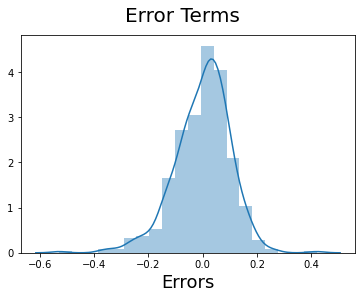

In [275]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

In [259]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [260]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test                      # X-label

In [261]:
X_train_new=X_train_rfe6.drop(['const'], axis=1)

In [262]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [263]:
#Making predictions on the chosen model

y_pred = lm6.predict(X_test_new)

Text(0, 0.5, 'y_pred')

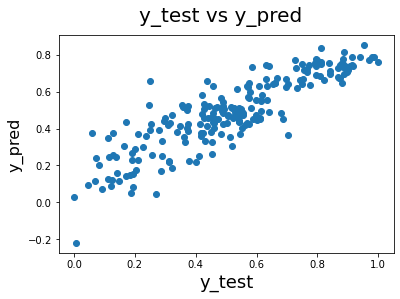

In [264]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18,)                          # X-label
plt.ylabel('y_pred', fontsize=16)      

In [265]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [266]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.11939016310678746

In [267]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.7503617019362661

In [270]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))


0.11939016310678746

In [271]:
X_t=X_train_new.iloc[:,0].values

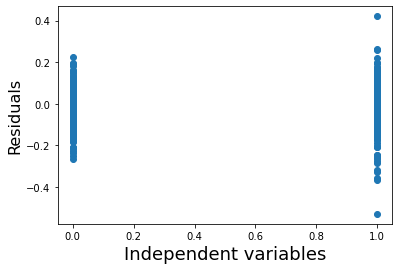

In [272]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              
plt.xlabel('Independent variables', fontsize=18)                          
plt.ylabel('Residuals', fontsize=16)  
plt.show()

When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [273]:
print(X_train_rfe6.columns)
print(lm6.summary())

Index(['const', 'yr', 'holiday', 'windspeed', 'season_spring', 'mnth_Dec',
       'mnth_Jan', 'mnth_Nov', 'mnth_Sep', 'weathersit_Bad',
       'weathersit_Good'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          1.37e-160
Time:                        19:29:38   Log-Likelihood:                 433.50
No. Observations:                 510   AIC:                            -845.0
Df Residuals:                     499   BIC:                            -798.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coe

We can see that the equation of our best fitted line is:

$ cnt = 0.4822 \times constant + 0.2464  \times  year - 0.0861  \times  holiday - 0.2056 \times windspeed - 0.2204 \times seasonspring + -1048 \times mnth_Dec - 0.1204 \times mnth_Jan - 0.0931 \times mnth_Nov + 0.0768 \times mnth_Sep -0.2209 \times weathersit_Bad + 0.0891 \times weathersit_Good $